## 데이터 수집
- 오픈 데이터 또는 내부 데이터
- 데이터와 관련된 외부 데이터를 추가
- 저장 방법

## 전처리
- 데이터 분석에 기반한 전처리
   - numeric, categorical feature에 맞는 전처리
   - 데이터 유형에 따른 전처리 : 이미지, 텍스트, 시계열 등
      - 이미지 : 사이즈, 색상, binarize, 알고리즘(haralick 등)
      - 텍스트 : 불필요한 기호 제거, 특정 단어, 문장 등 추출
      - 시계열 : 
- 피쳐 엔지니어링
   - 결측치 처리 : feature에 결측치가 있는 경우 처리방법
   - 스케일링 : 데이터의 통계값을 균형있게 변환
   - 바이닝 : 연속값에서 구간별로 나누는 방법
   - 텍스트 추출 : 문자열 데이터에서 특정 부분을 추출
   - 아웃라이어 : 아웃라이어가 있는 경우 처리 (폭스, 쿡스, 특정값 기준으로 제거)
   - 로그변환 : 왜곡된 데이터를 바로잡는 방법
   - 더미변수 : 범주형 데이터를 숫자형 데이터로 변환 : onehot, ordinal encoder 등
   - 그룹핑 : feature의 유니크 값이 많은 경우 특정 기준으로 그룹화하는 방법
   - 날짜추출 : 시계열 데이터에서 년, 월, 일, 요일, 주차, 시간 등을 추출하는 방법
   - 상호작용 : feature 간 합, 곱 등으로 새로운 feature 생성 : polynomialfeature 등
   - 변수선택 : target과 상관관계가 높은 feature 등을 선택 
      - ANOVA, 분산선택(VarinaceThreshold), 단일변수선택(SelectPercentile), 모델기반선택(SelectFromModel), 순차적선택(SequentialFeatureSelect)
   - 새로운 feature 창출 : 이외 방법으로 데이터에 새로운 feature를 생성
- decomposition
   - pca
   - t-nse

## 모델링
- model fitting : ML, DL 모델을 사용하여 데이터로부터 모수 추정 : 
- model optimization : 모델의 성능을 개선하기 위한 모형 최적화 (ensemble)
   - 취합 aggregation : Voting, Bagging, RF
   - 부스팅 boosting : Adaboost, Gradientboost, XGBoost, LightGBM 등
   - 하이퍼파라미터 튜닝 : ValidationCurve, GridSearchCV, RandomizedSearchCV, HalvingCV
   - Cross Validate : KFold, RepeatedStratifiedKFold, 외 여러가지 cv
   
- 강화학습   
   
## 모델 평가
- fitting을 완료한 모델의 예측값을 토대로 모델의 성능 평가
   - 회귀 :
      - error를 사용한 다양한 지표들
      - 교차엔트로피(log loss값)
   - 분류 :
      - accuracy, precision, recall, fall-out, f1, auc
      - feature importance, OOB (RF계열 모델), PD-ICE(feature와 target의 상관관계), 모델의 통계적 비교(빈도주의적, 베이지안 추정) 

## MLOps
- 모델의 유지관리를 위한 방법

## tip

** 모형 결합 **
- 모형 결합에서 취합 aggregation 방법인 다수결 방법(voting)과 배깅 방법(bagging)의 성능은 상황에 따라 다르다.
   - voting 방법은 여러 가지 개별 모델을 합한 방식
   - bagging 방법은 한가지 개별 모델을 여러가지 랜덤한 train 데이터를 사용한 방식

** 이미지 데이터 분석 **
- 이미지 데이터를 모델로 분석하기 위해서는 1차원 벡터 형태로 변형시켜야한다.
   - 즉 이미지 데이터 X 행렬에서 하나의 행이 하나의 이미지 벡터가 된다. 
- X 행렬의 feature가 픽셀을 하나로 합한 것 만큼 커지게 된다.
   - (100, 100, 3) ---> (100 * 100 * 3) ---> 30,000개의 feature
   - 이러한 문제에 따라서 행렬 자체를 효과적으로 변형하기 위한 여러 방법들을 사용할 수 있다.
   - PCA, gray 변환, haralick 함수 등등...
- feature가 커지므로 즉, x_d의 갯수가 많아질 수록 모델을 사용한 분석의 정확도가 떨어지거나 시간이 학습 시간이 오래 걸리 수가 있다.
- 각 모델마다 분석하는 방법 즉, 조건부 확률 P(y=k|x)를 구하거나, 판별 경계면(선)을 구하는 방법이 다른 것을 감안하여 적용해야 효율적이다.
- 올리베티 이미지 분류 분석에서 LogisticRegression 모델을 사용하면, 모수추정을 위한 기준값 threshold를 구하기 위해 많은 계산을 해야하며, 또한 하이퍼파라미터 튜닝에 사용하는 parameter의 조합 실험도 하게 되면 많은 시간이 필요하다.
   - 그러나 LDA 모델을 사용하면, 조건부확률을 구하기 위해 베이즈 정리를 계산하는데, 가능도를 다변수 정규분포라고 가정한 상태에서 공분산 행렬을 추정하면 되므로 상대적으로 계산 + 실험 시간이 줄어들게 된다.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.naive_bayes import (GaussianNB, BernoulliNB, MultinomialNB)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (VotingClassifier, BaggingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)

In [31]:
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     KFold, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score,
                             roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report)

## 모델 pipeline
- transformer
- preprocessor
- feature_engineering
- model_pipeline

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

In [7]:
path = 'https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv'

data = pd.read_csv(path)
target = "cnt"
numeric_features = ["temp", "hum", "windspeed", "days_since_2011", "yr"]
categorical_features = [f for f in data.columns \
                        if (f not in numeric_features) & (f != target)]

X = data.copy().drop([target], axis=1)
y = data.copy()[target]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [8]:
X_train.shape

(584, 11)

In [14]:
# transformer
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)
categorical_transformer = Pipeline(
    steps=[("one_hot", OneHotEncoder())]
)

# preprocessor
model_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", numeric_transformer, numeric_features),
        ("cat_transformer", categorical_transformer, categorical_features)
    ], remainder="passthrough"
)

# feature engineering
feature_engineering = Pipeline(
    steps=[
        ("model_preprocessor", model_preprocessor),
        ("polynomial_features", PolynomialFeatures(degree=2, 
                                              interaction_only=True, 
                                              include_bias=False)),
        ("variance_threshold", VarianceThreshold())
    ]
)

# Pipeline
model_pipe = Pipeline(
    steps=[
        ("feature_engineering", feature_engineering),
        ("model", Lasso())
    ]
)

# GridSearchCV
cv = TimeSeriesSplit(n_splits=5, test_size=(7*2), gap=0)
param_grid = {"model__alpha": np.logspace(-3, 3, 10)}
model_gscv = GridSearchCV(
    estimator=model_pipe, 
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=cv
)

model_gscv = model_gscv.fit(X_train, y_train)
model_gscv

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=14),
             estimator=Pipeline(steps=[('feature_engineering',
                                        Pipeline(steps=[('model_preprocessor',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('num_transformer',
                                                                                          Pipeline(steps=[('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['temp',
                                                                                           'hum',
                                                                                           'windspeed',
                                                                                           'days_since_2011',
                                                                                           'yr']),
                                                                                         ('cat_tr...
                                                        ('polynomial_features',
                                                         PolynomialFeatures(include_bias=False,
                                                                            interaction_only=True)),
                                                        ('variance_threshold',
                                                         VarianceThreshold())])),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

## GridSearchCV에 여러가지 모델을 사용할 때
- pipe line 대신 사용

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

iris = load_iris()
X = iris.data
y = iris.target

models = {
    "rf_clf": RandomForestClassifier(min_samples_leaf=5, random_state=0),
    "dt_clf": DecisionTreeClassifier(min_samples_leaf=5, random_state=0)
}

param_grid = {
    "rf_clf": {"n_estimators": [10, 20, 30]},
    "dt_clf": {"max_depth": [3, 4, 5]}
}

cv = KFold(5, shuffle=True, random_state=0)

results = []
for name, model in models.items() : 
    gridcv = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        return_train_score=True,
        cv=cv
    ).fit(X, y)
    result = {"model": name, "cv_results": pd.DataFrame(gridcv.cv_results_)}
    results.append(result)  

In [26]:
rf_df = results[0]["cv_results"].sort_values("rank_test_score", ascending=True)[["mean_test_score", "rank_test_score", "params"]]
rf_df["model"] = results[0]["model"]
rf_df

,mean_test_score,rank_test_score,params,model
2,0.953333,1,{'n_estimators': 30},rf_clf
1,0.940000,2,{'n_estimators': 20},rf_clf
0,0.933333,3,{'n_estimators': 10},rf_clf


In [27]:
dt_df = results[1]["cv_results"].sort_values("rank_test_score", ascending=False)[["mean_test_score", "rank_test_score", "params"]]
dt_df["model"] = results[1]["model"]
dt_df

,mean_test_score,rank_test_score,params,model
0,0.966667,1,{'max_depth': 3},dt_clf
1,0.966667,1,{'max_depth': 4},dt_clf
2,0.966667,1,{'max_depth': 5},dt_clf


In [28]:
rf_dt_df = pd.concat([rf_df, dt_df], axis=0).sort_values("mean_test_score", ascending=False)
rf_dt_df

,mean_test_score,rank_test_score,params,model
0,0.966667,1,{'max_depth': 3},dt_clf
1,0.966667,1,{'max_depth': 4},dt_clf
2,0.966667,1,{'max_depth': 5},dt_clf
2,0.953333,1,{'n_estimators': 30},rf_clf
1,0.940000,2,{'n_estimators': 20},rf_clf
0,0.933333,3,{'n_estimators': 10},rf_clf


## 데이터 프레임에 모델 결과를 바로 저장

In [7]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
def get_misclf_error(y_test, y_pred) : 
    
    return 1 - accuracy_score(y_test, y_pred)

In [12]:
X, y = make_gaussian_quantiles(
    n_samples=2000, n_features=10, n_classes=3, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=0)

n_estimators = 300
weak_clf = DecisionTreeClassifier(max_leaf_nodes=8)
ada_clf = AdaBoostClassifier(base_estimator=weak_clf, n_estimators=n_estimators,
                            algorithm="SAMME")
ada_clf.fit(X_train, y_train)

boosting_errors = pd.DataFrame({
    "number_of_trees": range(1, n_estimators + 1),
    "adaboost": [
        get_misclf_error(y_test, y_pred) \
        for y_pred in ada_clf.staged_predict(X_test)
    ]
}).set_index("number_of_trees")

boosting_errors

,adaboost
number_of_trees,
1,0.500000
2,0.613333
3,0.476667
4,0.406667
5,0.420000
...,...
296,0.301667
297,0.300000
298,0.295000


## grid search cv에서 특정한 지표의 값을 반복적가져와 데이터 프레임으로 변환

In [ ]:
'''

importance_type = [
    "weight",
    "gain",
    "cover",
    "total_gain",
    "total_cover"
]

tree_feature_importance_df = pd.concat(
    [
        pd.DataFrame.from_dict(
            data=(tree_grid_search \
                  .best_estimator_["tree_regressor"] \
                  .get_booster() \
                  .get_score(importance_type=t)
                 ),
            orient="index",
            columns=[t]
        ) for t in importance_type
    ],
    axis=1
)

tree_feature_importance_df

'''

## plot colors
- colors에서 하나씩 선택하여 plot에 직접 사용가능

In [46]:
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100

In [47]:
sns_c

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## GridSearchCV의 여러개의 성능 지표를 비교하는 그래프
- refit과 scoring 에 사용할 scoring dict 생성
   - GCV의 내부에서 계산할 성능 지표를 설정
- make_scorer() 사용하여 GCV의 scoring 설정
- GCV의 refit 파라미터 사용
   - 추정기의 내부 성능 지표로 사용할 수 있음

In [7]:
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [8]:
X, y = make_hastie_10_2(n_samples=8000, random_state=30)
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 param_grid={"min_samples_split": range(2, 403, 20)},
                 refit="AUC",
                 scoring=scoring,
                 return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'params', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC', 'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC', 'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy', 'split2_train_Accuracy', 'split3_train_Accuracy', 'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'])

In [15]:
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)
X_axis

array([  2.,  22.,  42.,  62.,  82., 102., 122., 142., 162., 182., 202.,
       222., 242., 262., 282., 302., 322., 342., 362., 382., 402.])

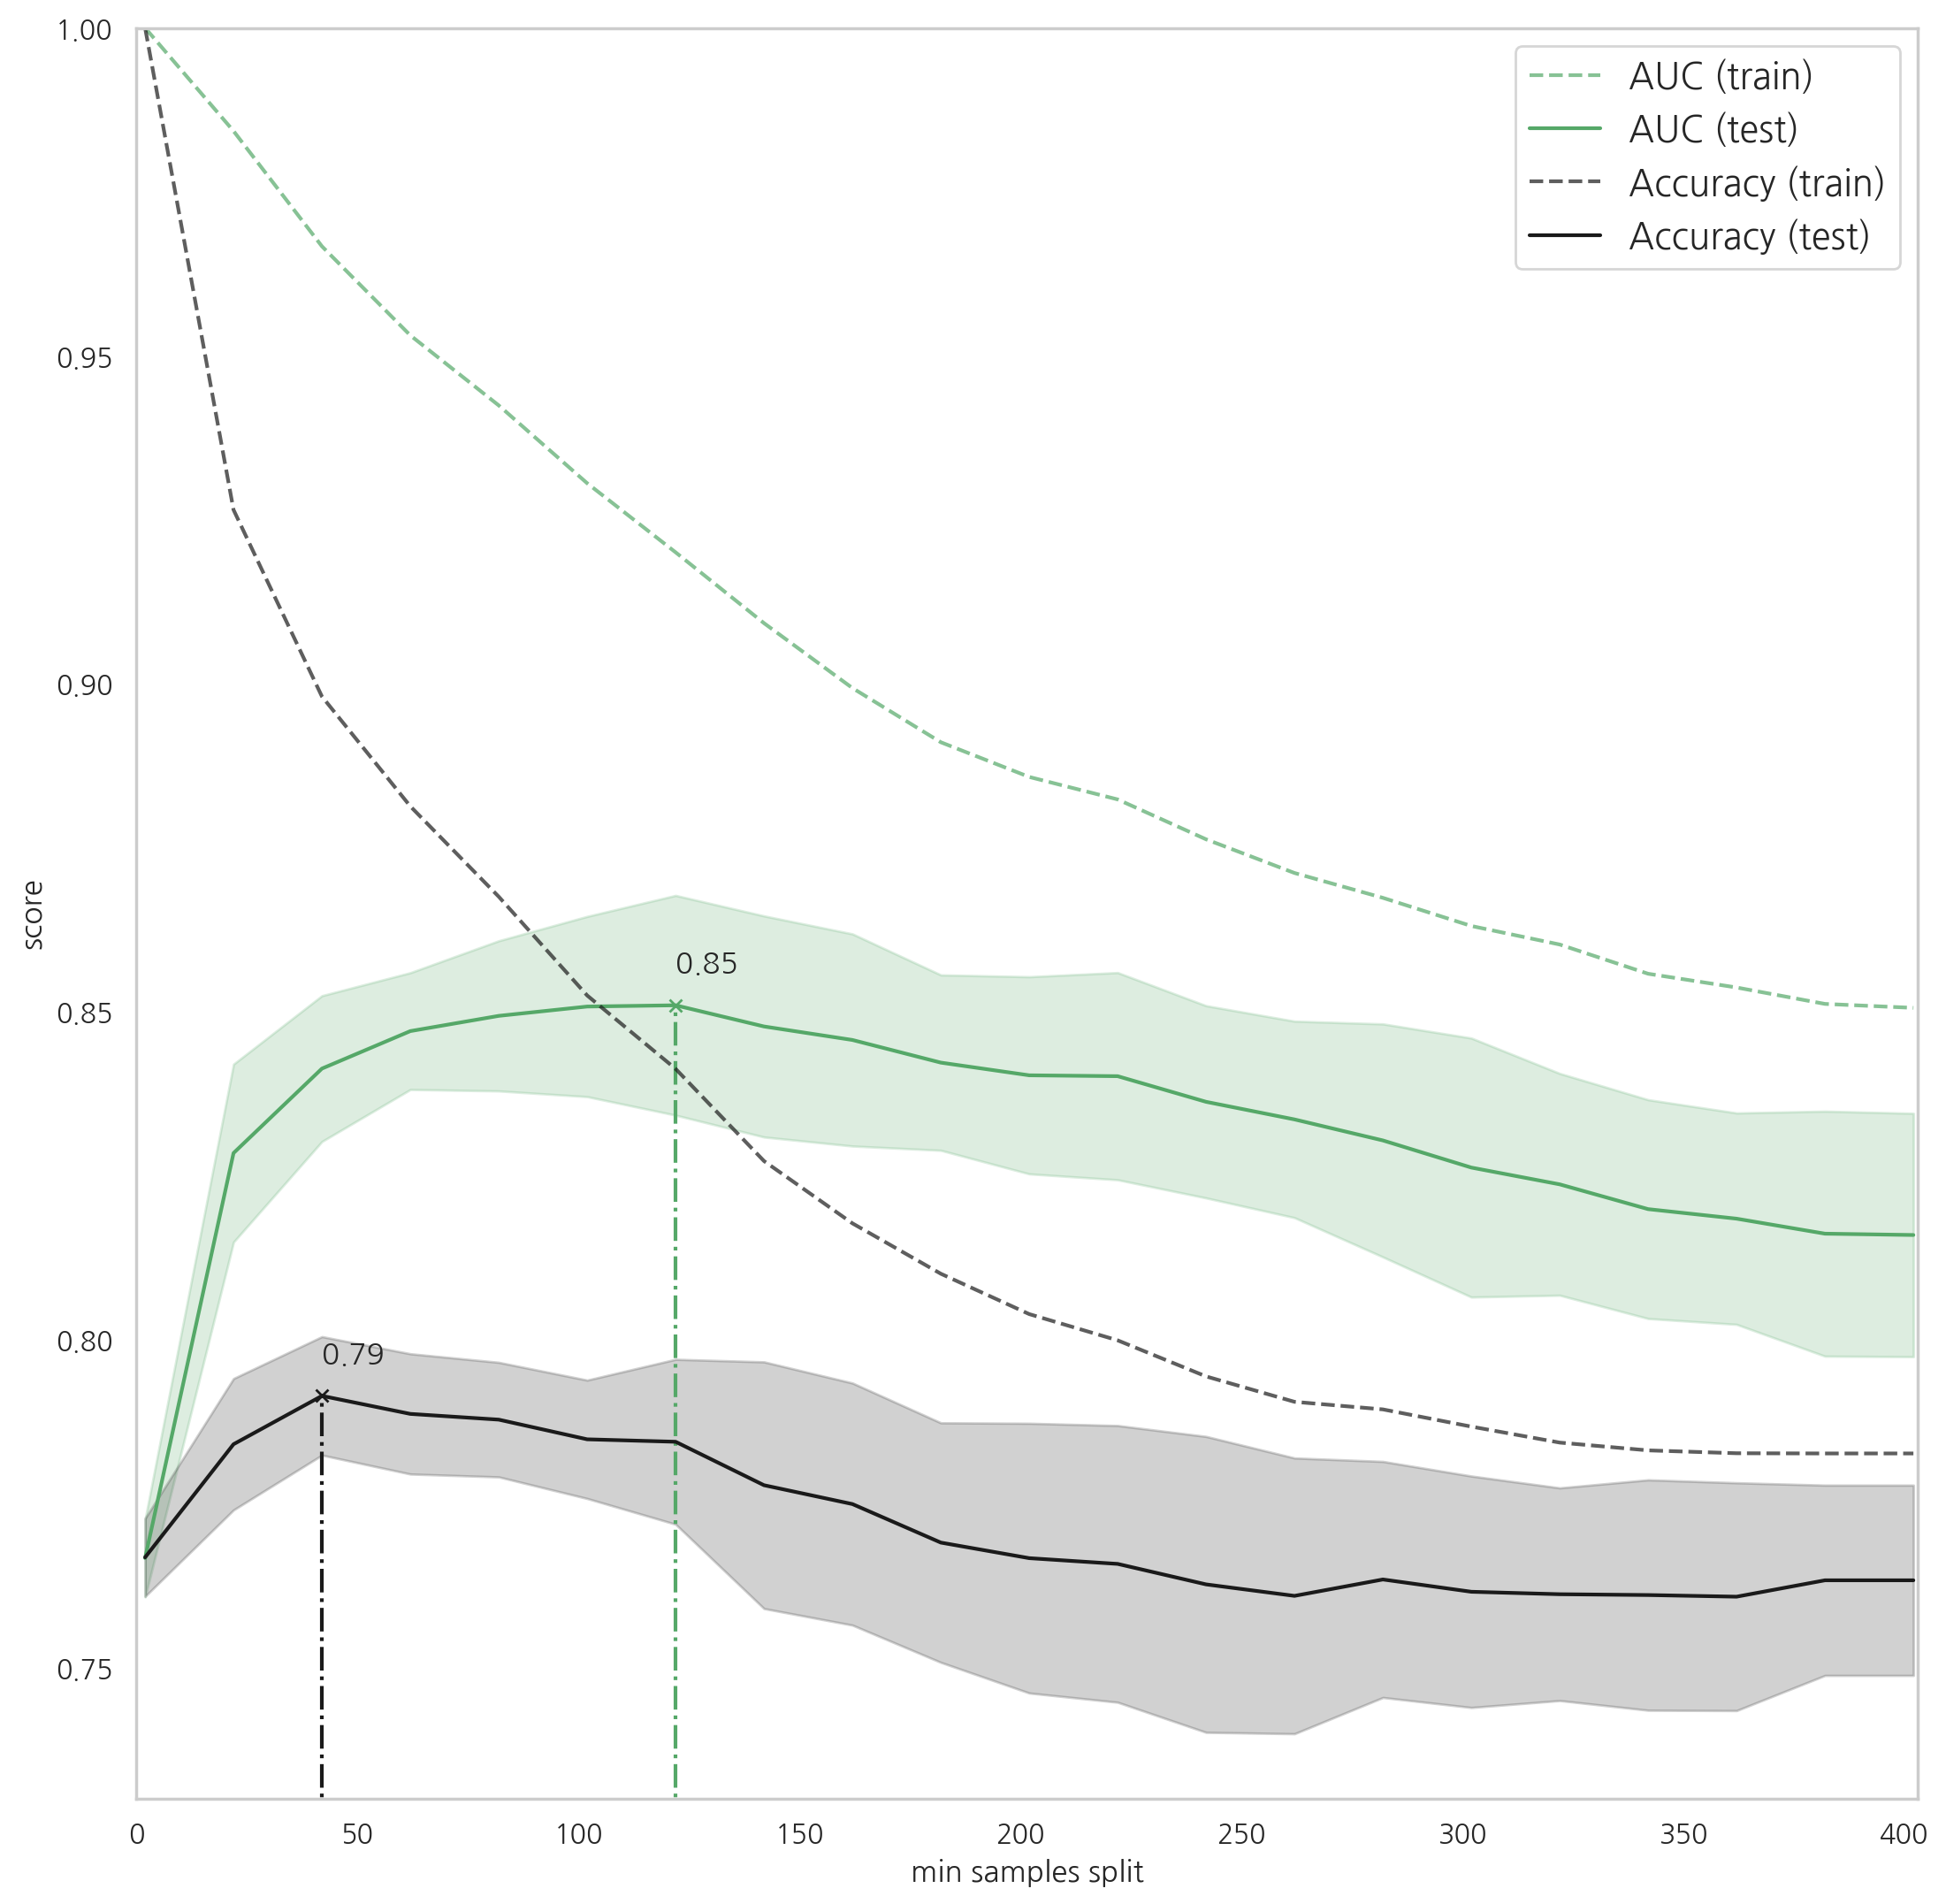

In [26]:
%matplotlib inline

plt.figure(figsize=(13, 13))
ax = plt.gca()

# AUC g, Accuracy k : sorted(dict) 하면 key 값만 가져온다.
for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) : 
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        
        # mean test score의 분산 영역 : alpha 조건문
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            color=color,
            linestyle=style,
            alpha=0.2 if sample == "test" else 0.0)
        # train, test score 라인
        ax.plot(
            X_axis,
            sample_score_mean,
            color=color,
            linestyle=style,
            alpha=1.0 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample))
    
    # np.nonzero() : 0이 아닌 값의 인덱스를 반환
    best_index = np.nonzero(results["rank_test_%s" % (scorer)]==1)[0][0]
    best_score = results["mean_test_%s" % (scorer)][best_index]   
    ax.plot(
        # [X_axis[best_index], X_axis[best_index]] : x1, x2 좌표
        [X_axis[best_index]] * 2, 
        [0, best_score],
        color=color,
        linestyle="-.",
        marker="x",
        ms=5)
    # best score 표시
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.xlabel("min samples split")
plt.ylabel("score")
plt.xlim(0, 403)
plt.ylim(0.73, 1.0)
plt.grid(False)
plt.legend(loc="best", fontsize="large")
plt.show() ; 

## 컬럼 변환기
- 범주형 독립변수를 실수형 독립변수로 변환하여 학습에 사용하기 위함
- ColumnTransfer()
    - Encoder
       - numeric : QuantileTransformer()
       - categorical : OneHotEncoder(), OrdinalEncoder()

## 실수, 이진수, 자연수가 혼합되어 있는 데이터의 분석
- 가우시안분포 NB, 베르누이분포 NB, 다항분포 NB를 표본의 특성에 맞게 학습한 뒤
- 각 모델별 가능도를 구하고 
- 각 모델 가능도를 곱하면 전체 예측값을 구할 수 있다.

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report

covt = fetch_covtype()
X = covt.data
y = covt.target

# 데이터에서 실수형, 정수형으로 구분
X1 = X[:, :10]
X2 = X[:, 10:]

# 모델 fitting
model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

# 모델별 예측값의 확률계산
prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

# 모델별 가능도 계산
likelihood_1 = prob1 / model1.class_prior_
likelihood_2 = prob2 / model1.class_prior_

# 조건부 확률 계산 : 두 모델의 가능도와 사전확률의 곱
prob = likelihood_1 * likelihood_2 * model1.class_prior_

# 조건부 확률의 값중 각 행에서 가장 큰 확률의 인덱스값(여기서는 클래스)
y_pred = np.argmax(prob, axis=1) + 1

# 분류 레포트 
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66    211840
           2       0.75      0.67      0.71    283301
           3       0.64      0.66      0.65     35754
           4       0.34      0.71      0.46      2747
           5       0.18      0.37      0.24      9493
           6       0.36      0.47      0.41     17367
           7       0.43      0.68      0.53     20510

    accuracy                           0.65    581012
   macro avg       0.48      0.60      0.52    581012
weighted avg       0.68      0.65      0.66    581012



## dict의 value 기준 sort

'''

scores = dict(zip(model_names, scores))

model_scores = [(k, v.mean().round(1)) for k, v, in scores.items()]

sort_scores = dict(np.sort(model_scores, axis=0)[::-1])

sort_socres

'''

## 정규표현식을 사용한 데이터 프레임 columns 조회

In [20]:
# s 또는 w 로 시작하는(^) column 조회

data.filter(regex="^(s|w)").tail()

,season,weekday,workingday,weathersit,windspeed
726,WINTER,THU,WORKING DAY,MISTY,23.458911
727,WINTER,FRI,WORKING DAY,MISTY,10.416557
728,WINTER,SAT,NO WORKING DAY,MISTY,8.333661
729,WINTER,SUN,NO WORKING DAY,GOOD,23.500518
730,WINTER,MON,WORKING DAY,MISTY,10.374682


In [35]:
# 1로 끝나는($) column 조회

data.filter(regex="1$").tail()

,days_since_2011
726,726
727,727
728,728
729,729
730,730


In [33]:
# m, p 중 하나라도 있는 column 조회

data.filter(regex="[mp]").tail()

,mnth,temp,hum,windspeed
726,DEC,3.945849,65.2917,23.458911
727,DEC,3.906651,59.0000,10.416557
728,DEC,3.906651,75.2917,8.333661
729,DEC,4.024151,48.3333,23.500518
730,DEC,2.144151,57.7500,10.374682


In [32]:
# 숫자 0~9 가 들어있는 column 조회

data.filter(regex="[\d]").tail()

,days_since_2011
726,726
727,727
728,728
729,729
730,730


In [34]:
# 숫자 0~9가 들어있지 않은 column 조회

data.filter(regex="[\D]").tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
726,WINTER,2012,DEC,NO HOLIDAY,THU,WORKING DAY,MISTY,3.945849,65.2917,23.458911,2114,726
727,WINTER,2012,DEC,NO HOLIDAY,FRI,WORKING DAY,MISTY,3.906651,59.0000,10.416557,3095,727
728,WINTER,2012,DEC,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,3.906651,75.2917,8.333661,1341,728
729,WINTER,2012,DEC,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,4.024151,48.3333,23.500518,1796,729
730,WINTER,2012,DEC,NO HOLIDAY,MON,WORKING DAY,MISTY,2.144151,57.7500,10.374682,2729,730


In [37]:
# holi와 다음 문자열이 day인 column 조회

data.filter(regex="holi(?=day)").tail()

,holiday
726,NO HOLIDAY
727,NO HOLIDAY
728,NO HOLIDAY
729,NO HOLIDAY
730,NO HOLIDAY


In [41]:
# day앞의 문자열이 working과 일치하는 column

data.filter(regex="(?<=working)day").tail()

,workingday
726,WORKING DAY
727,WORKING DAY
728,NO WORKING DAY
729,NO WORKING DAY
730,WORKING DAY


In [42]:
# day앞의 문자열이 working과 일치하지 않는 column

data.filter(regex="(?<!working)day").tail()

,holiday,weekday,days_since_2011
726,NO HOLIDAY,THU,726
727,NO HOLIDAY,FRI,727
728,NO HOLIDAY,SAT,728
729,NO HOLIDAY,SUN,729
730,NO HOLIDAY,MON,730


## dict의 value 값 업데이트

In [45]:
param_grid = {
    "max_depth": 1.0,
    "alpha": 1.0,
    "learning_rate": 1.0
}

settings = [{"max_depth": 2.0}, {"alpha": 3.0}, {"learning_rate": 4.0}]

for setting in settings : 
    param_grid.update(setting)
    print(param_grid)

{'max_depth': 2.0, 'alpha': 1.0, 'learning_rate': 1.0}
{'max_depth': 2.0, 'alpha': 3.0, 'learning_rate': 1.0}
{'max_depth': 2.0, 'alpha': 3.0, 'learning_rate': 4.0}


## OOB
- out-of-bag : 기존 훈련세트에 없던 데이터 세트로 fitting하는 방식
   - 그래디언트 부스팅 모델의 속성값 oob_improvement_ 값으로 oob 추정값 계산
   - cv에서 train date set에 사용되지 않은 인덱스를 사용하여, GradientBoosting 모델을 fitting하고 각 단계별로 클래스 확률값을 반환받는다.
- oob_improvement_ 값은 부스팅의 최적의 수를 추정하게 끔한다.    

def heldout_score(clf, X_test, y_test) : 
    
    score = np.zeros((n_estimators,), dtype=np.float64)
    
    # 각 staged 별 클래스 확률값 반환
    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)) : 
        score[i] = 2 * log_loss(y_test, y_proba[:, 1])
        
    return score

def cv_estimate(n_splits=None) : 
    
    cv = KFold(n_splits=n_splits)
    cv_clf = GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators, ), dtype=np.float64)
    
    # cv.split : 데이터를 train, test 집합으로 구분하고 인덱스 반환
    for train, test in cv.split(X_train, y_train) :
        cv_clf.fit(X_train[train], y_train[train])
        
        # out-of-bag 평가 : 사용되지 않은 샘플(test index)로 평가
        val_scores += heldout_score(cv_clf, X_train[test], y_train[test])
    
    # log-loss / 교차검증 횟수
    val_scores /= n_splits
    
    return val_scores

## 데이터 프레임에서 각 프레임별 색상 다르게 표현

'''

linear_model_coef_df\
    .head(20)\
    .style\
    .background_gradient(
        cmap="viridis_r",
        axis=0,
        subset=["abs_coef_"]
)

'''